# Expression Array QA/QC Workflow



## Load Necessary R Functions and Libraries

In [4]:
library(gdata)
library(oligo)
library(pd.mogene.2.1.st)
library(mogene21sttranscriptcluster.db)
library(Heatplus)
library(ggplot2)
library(reshape2)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:gdata’:

    combine

The following object is masked from ‘package:stats’:

    xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, intersect,
    is.unsorted, lapply, Map, mapply

In [69]:
## Load libraries and functions for the QA/QC plots
source('array_qa_qc_functions.r')

## Load Sample Annotations

In [7]:
## Read the annotation spreadsheet into R
annot_dir = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array'
setwd(annot_dir)
sample_annot = read.xls('BatPlate_Annotation_editedMM.xlsx', header=T, as.is=T, na.strings=c(""," ", "NA", "#DIV/0!"))
rownames(sample_annot) = sample_annot$ID

In [8]:
## Check annotation dataframe
head(sample_annot[,1:5])

,ID,Mating,Number,RIN,Dam
13067x16912_f67bat,13067x16912_f67bat,13067x16912,67,9.1,13067
13067x16912_f68bat,13067x16912_f68bat,13067x16912,68,8.8,13067
13067x16912_f69bat,13067x16912_f69bat,13067x16912,69,1.6,13067
13140x16680_f84bat,13140x16680_f84bat,13140x16680,84,8.7,13140
13140x16680_f86bat,13140x16680_f86bat,13140x16680,86,9.3,13140
13140x16680_f95bat,13140x16680_f95bat,13140x16680,95,9,13140


## Load Raw Expression Data

In [9]:
## Set directory where .CEL files are located, and get the list of files
cel_dir = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/Bat_Virus_Array/data'
cel_files = list.celfiles(cel_dir)
## Check file names
cel_files[1:3]

[1] "13067x16912_f67bat_2.CEL" "13067x16912_f68bat_2.CEL"
[3] "13067x16912_f69bat_2.CEL"

In [10]:
## Create sample names
sample_names = gsub("_2.CEL", "", cel_files)
## Check sample names
sample_names[1:5]

[1] "13067x16912_f67bat" "13067x16912_f68bat" "13067x16912_f69bat"
[4] "13140x16680_f84bat" "13140x16680_f86bat"

In [11]:
## Subset sample annotation dataframe
sample_annot = sample_annot[sample_names,]
length(sample_names) == dim(sample_annot)[1]

[1] TRUE

In [12]:
## Create a phenoData object
phenoData = new("AnnotatedDataFrame", data=sample_annot)
phenoData

An object of class 'AnnotatedDataFrame'
  rowNames: 13067x16912_f67bat 13067x16912_f68bat ... 8056x8033_f90bat
    (95 total)
  varLabels: ID Mating ... OnArray (28 total)
  varMetadata: labelDescription

In [13]:
## Load the raw expression data
raw.exprs = read.celfiles(file.path(cel_dir, cel_files), pkgname="pd.mogene.2.1.st", 
                          sampleNames=sample_names, phenoData=phenoData)

Platform design info loaded.


Reading in : 13067x16912_f67bat_2.CEL
Reading in : 13067x16912_f68bat_2.CEL
Reading in : 13067x16912_f69bat_2.CEL
Reading in : 13140x16680_f84bat_2.CEL
Reading in : 13140x16680_f86bat_2.CEL
Reading in : 13140x16680_f95bat_2.CEL
Reading in : 16188x3252_f281bat_2.CEL
Reading in : 16188x3252_f282bat_2.CEL
Reading in : 16188x3252_f283bat_2.CEL
Reading in : 16188x8005_f2bat_2.CEL
Reading in : 16188x8005_f3bat_2.CEL
Reading in : 16188x8005_f4bat_2.CEL
Reading in : 16211x13140_f106bat_2.CEL
Reading in : 16211x13140_f108bat_2.CEL
Reading in : 16211x13140_f119bat_2.CEL
Reading in : 16211x16557_f11bat_2.CEL
Reading in : 16211x16557_f4bat_2.CEL
Reading in : 16211x16557_f8bat_2.CEL
Reading in : 16441x8024_f90bat_2.CEL
Reading in : 16441x8024_f94bat_2.CEL
Reading in : 16441x8024_f95bat_2.CEL
Reading in : 16557x13067_f90bat_2.CEL
Reading in : 16557x13067_f91bat_2.CEL
Reading in : 16557x13067_f98bat_2.CEL
Reading in : 16912x5489_f138bat_2.CEL
Reading in : 16912x5489_f139bat_2.CEL
Reading in : 16912x5

Warning message:
In read.celfiles(cel_files, pkgname = "pd.mogene.2.1.st", sampleNames = sample_names, : 'channel' automatically added to varMetadata in phenoData.

In [14]:
head(pData(phenoData)[,1:5])

,ID,Mating,Number,RIN,Dam
13067x16912_f67bat,13067x16912_f67bat,13067x16912,67,9.1,13067
13067x16912_f68bat,13067x16912_f68bat,13067x16912,68,8.8,13067
13067x16912_f69bat,13067x16912_f69bat,13067x16912,69,1.6,13067
13140x16680_f84bat,13140x16680_f84bat,13140x16680,84,8.7,13140
13140x16680_f86bat,13140x16680_f86bat,13140x16680,86,9.3,13140
13140x16680_f95bat,13140x16680_f95bat,13140x16680,95,9,13140


## Summarize and Normalize Expression Data

In [15]:
## Create un-normalized ExpressionSet
bgcor.exprs = rma(raw.exprs, normalize=FALSE, target="core")

Background correcting
Calculating Expression


In [16]:
## Create normalized ExpressionSet
norm.exprs = rma(raw.exprs, normalize=TRUE, target="core")

Background correcting
Normalizing
Calculating Expression


In [17]:
## Save normalized expression to file
exprs(norm.exprs)[1:5,1:5]
#save(norm.exprs, file="bat_virus_array_normalized.rda")

,13067x16912_f67bat,13067x16912_f68bat,13067x16912_f69bat,13140x16680_f84bat,13140x16680_f86bat
17200001,5.195772,5.982837,4.499260,6.037560,6.575153
17200003,5.475109,5.256580,4.710076,5.566662,5.492598
17200005,4.238367,4.440133,6.107924,4.247000,4.376391
17200007,5.114754,4.456694,5.243998,4.568866,5.239138
17200009,5.581807,5.209224,6.269752,6.477348,5.293606


## Create Boxplots

In [28]:
describe(make.boxplot)


This function creates a boxplot of the raw or normalized expression values. If RIN values 
are available a subplot will be added.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
type: The type of plot to create, either 'raw' or 'norm'. 
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test') 
order.by: A character vector containing the column names that will be used to order 
   the samples (default is c('Mating', 'Sex', 'Number')).
color.by: The column name used to assign colors to the samples (default is 'Mating'). 
highlight.names: A character vector containing sample names (default=NULL). Can be used 
   to highlight samples in the plot. 
...: Additional parameters can be passed to format the x-axis labels.



Warning message:
In make.boxplot(bgcor.exprs, type = "raw", order.by = c("Mating", : NAs introduced by coercion

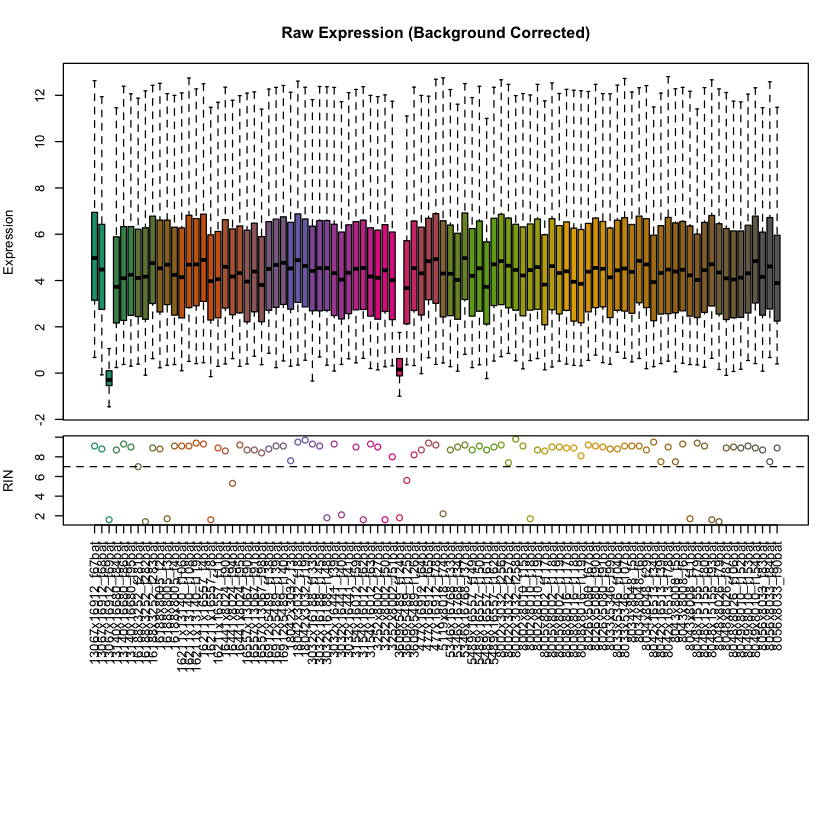

In [49]:
## Boxplot of un-normalized expression values
make.boxplot(bgcor.exprs, type = 'raw', order.by=c("Mating", "Number"), color.by="Mating", make.pdf=F)

Warning message:
In make.boxplot(norm.exprs, type = "norm", order.by = c("Mating", : NAs introduced by coercion

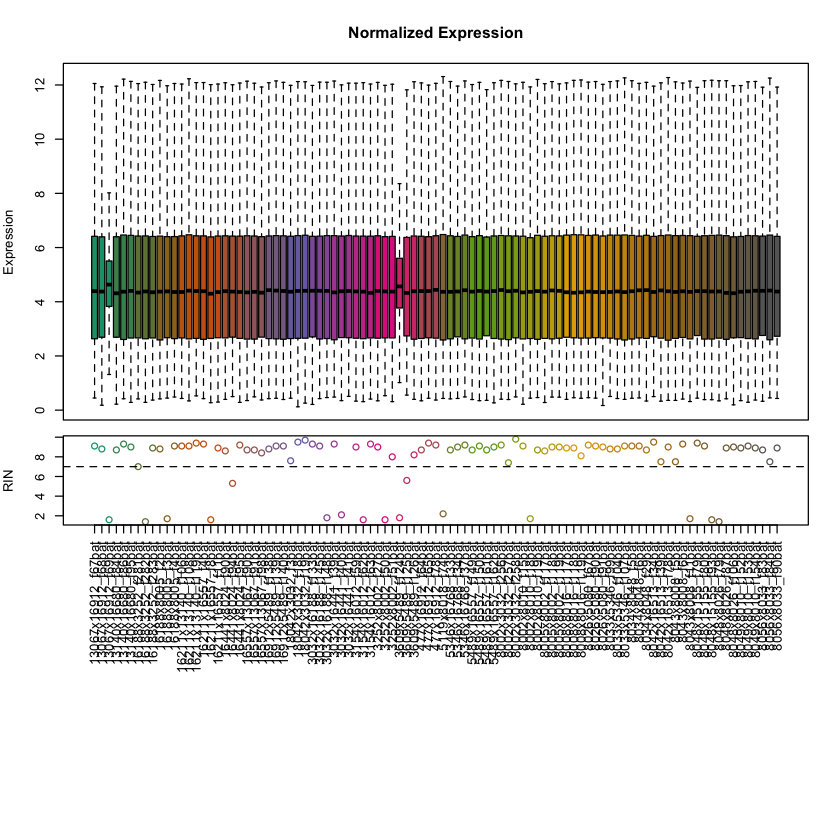

In [50]:
## Boxplot of normalized expression values
make.boxplot(norm.exprs, type = 'norm', order.by=c("Mating", "Sex", "Number"), color.by="Mating", make.pdf=F)

## Create Bacterial Spike Plot

In [61]:
describe(plot.bac.spikes)


This function creates a bacterial spike plot.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
pgf.file: A probe group file for the array.
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test').



In [40]:
## The probe group file from Affy for the array
pg_file = '/Users/mooneymi/Documents/MyDocuments/SystemsImmunogenetics/Expression/MoGene-2_1-st.pgf'

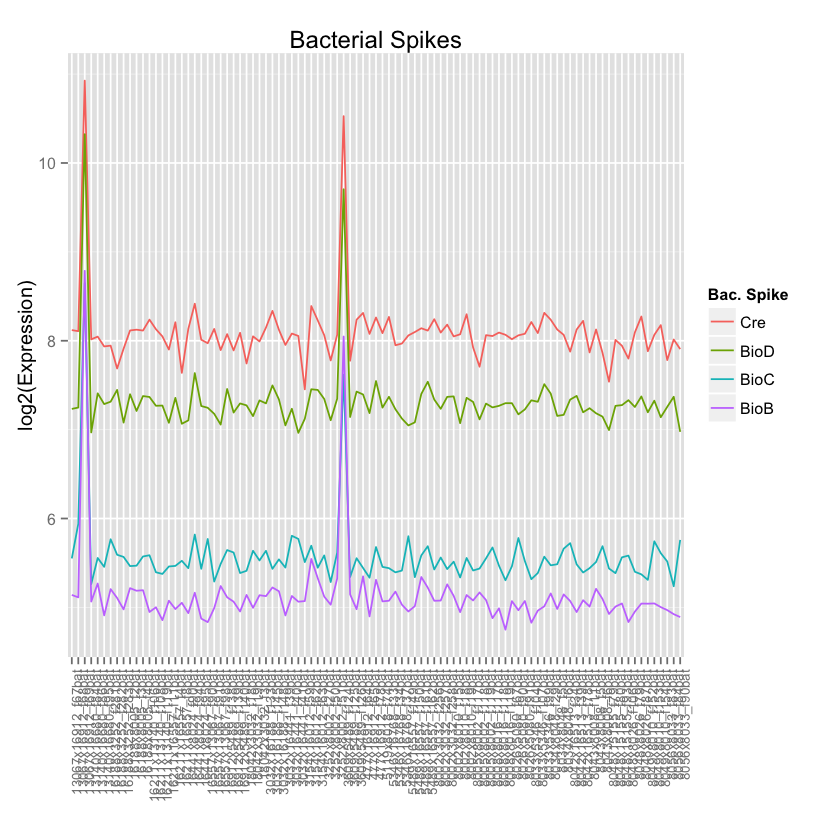

In [51]:
## Create bacterial spike plot
plot.bac.spikes(norm.exprs, pg_file, make.pdf=F)

## Create Heatmaps

In [70]:
describe(make.heatmap)


This function creates an annotated heatmap for expression data.

Parameters:
use.exprs: An ExpressionSet returned by the rma() function.
cut.dist: 
num.genes: A number indicating the number of most variable genes to include. If NULL, all genes
   will be included (default is 1000).
base.factors: A character vector containing column names that will be used to annotate the
   heatmap (default is c('Sex')).
rin.breaks: A numeric vector indicating the break points for discretizing the RIN 
   scores (default is c(0, 5, 7, 10)).
make.pdf: A logical indicating if a PDF should be created. 
base.name: The base filename of the PDF to create (default is 'test').



Warning message:
In make.heatmap(norm.exprs, base.factors = c("Sex", "D4_percent"), : NAs introduced by coercion

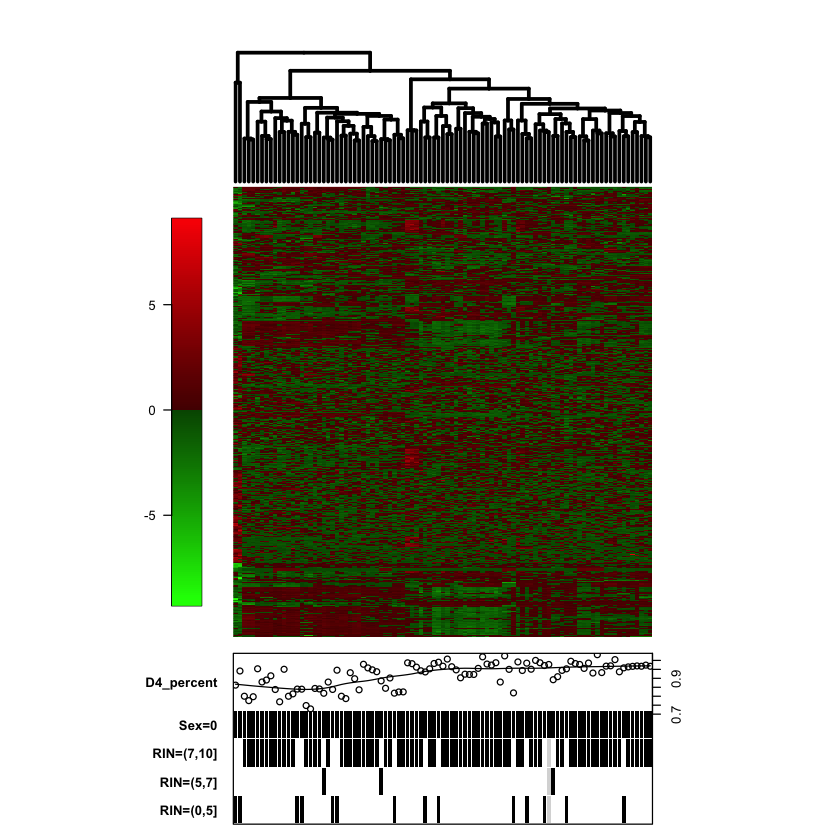

In [71]:
d = make.heatmap(norm.exprs, base.factors=c('Sex', 'D4_percent'), make.pdf=F)

#### Last Updated: 1-Feb-2016